In [1]:
import glob
import pickle
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from parameters import *
from windows import slide_window, search_windows
from annotate import draw_boxes


/Users/chuanhl/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.18.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/chuanhl/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.18.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/chuanhl/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


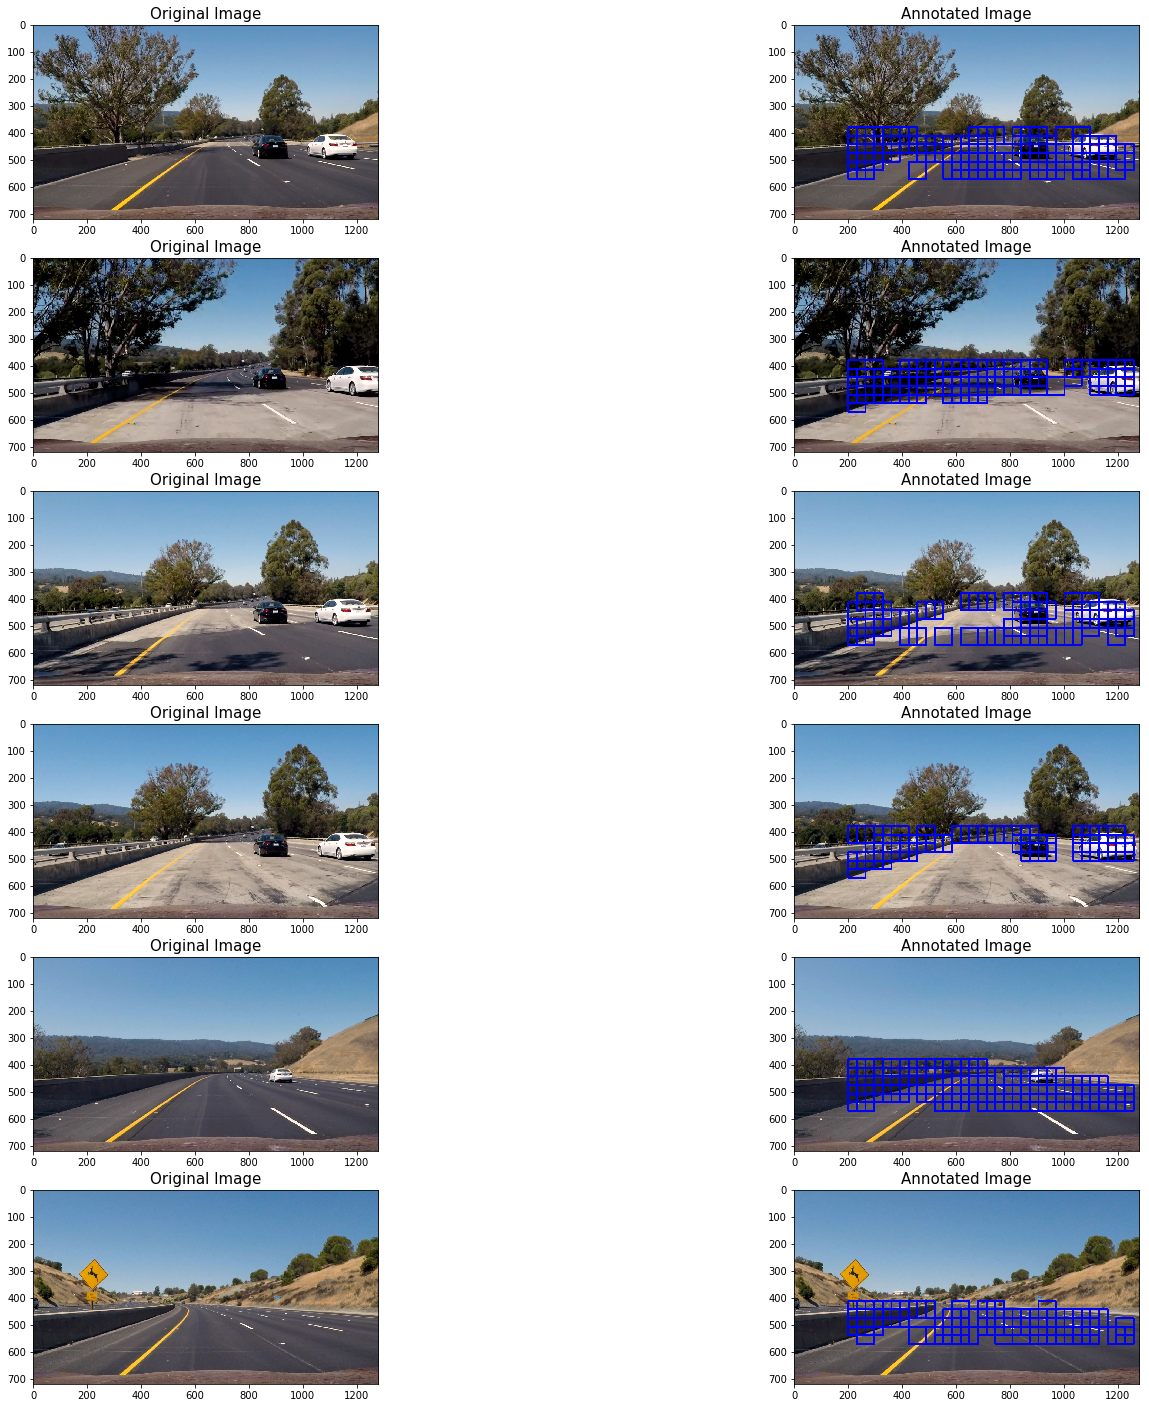

In [2]:
# Load images
fnames = glob.glob('./test_images/*')
images = []
for fname in fnames:
    img = mpimg.imread(fname)
    images.append(img)

with open(MODEL_FILE, mode='rb') as f:
    model_data = pickle.load(f)
model = model_data['svc']
X_scaler = model_data['X_scaler']
    
types = 2
f, axes = plt.subplots(len(images), types, figsize=(25,25))
axes = axes.ravel()

for i, image in enumerate(images):
    axes[types*i].imshow(image)
    axes[types*i].set_title('Original Image', fontsize=15)
    
    draw_image = np.copy(image)
    
    windows = slide_window(draw_image, x_start_stop=X_START_STOP, y_start_stop=Y_START_STOP, 
                           xy_window=XY_WINDOW, xy_overlap=XY_OVERLAP)
    hot_windows = search_windows(draw_image, windows, model, X_scaler, 
                                 color_space=COLOR_SPACE, 
                                 spatial_size=SPATIAL_SIZE, 
                                 hist_bins=HIST_BINS, 
                                 orient=ORIENT, 
                                 pix_per_cell=PIX_PER_CELL, 
                                 cell_per_block=CELL_PER_BLOCK, 
                                 hog_channel=HOG_CHANNEL, 
                                 spatial_feat=SPATIAL_FEAT, 
                                 hist_feat=HIST_FEAT, 
                                 hog_feat=HOG_FEAT)
    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)  
    
    axes[types*i+1].imshow(window_img)
    axes[types*i+1].set_title('Annotated Image', fontsize=15)
plt.savefig('./output_images/window_search_vis.png')